In [ ]:
pip install pmdarima statsmodels matplotlib seaborn pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.0 MB/s eta 0:00:00


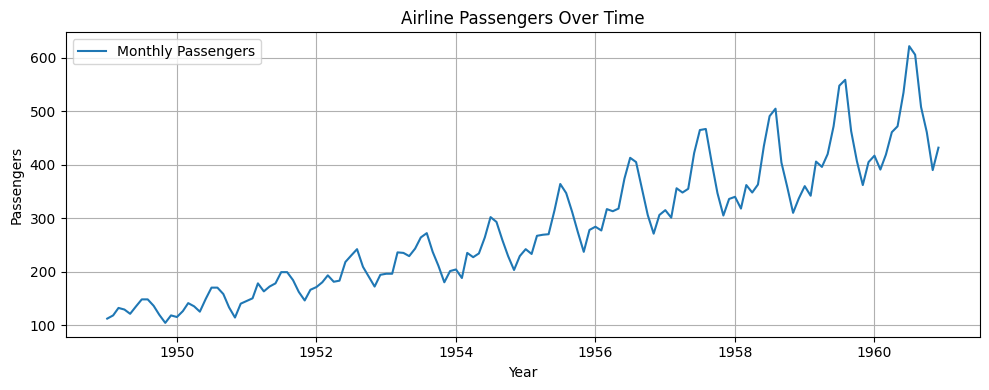

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
❌ Not stationary


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


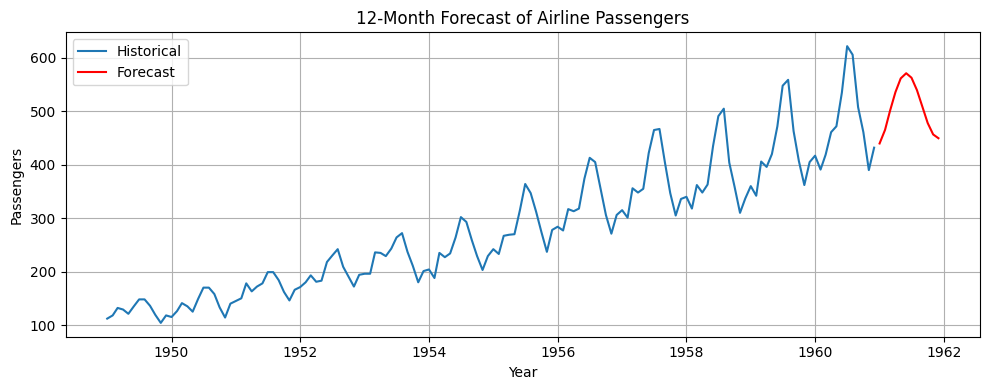

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.datasets import get_rdataset

# Load built-in AirPassengers dataset (or use any monthly data)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)

# Convert Month to datetime
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df = df.asfreq('MS')  # monthly start frequency

# Plot the data
plt.figure(figsize=(10, 4))
plt.plot(df['Passengers'], label='Monthly Passengers')
plt.title('Airline Passengers Over Time')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ADF Test
result = adfuller(df['Passengers'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print(" Stationary series")
else:
    print(" Not stationary")

# Fit a simple ARIMA model
model = ARIMA(df['Passengers'], order=(2, 1, 2))  # Example parameters
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='MS')

# Plot forecast
plt.figure(figsize=(10, 4))
plt.plot(df['Passengers'], label='Historical')
plt.plot(forecast_index, forecast, color='red', label='Forecast')
plt.title('12-Month Forecast of Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
